This notebook is the initial data exploration stage of my solution.

Determining:
* Which features are useful
* Calculated features
* Erroneous data to rectify

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

# Data exploration steps
1. Import training data
3. Make a first list of all the variables which might be useful
4. Explore the data using visualisation techniques
5. Identify missing data
6. Impute missing values - numerical (KNN imputation as variables are strongly influenced by, e.g., age. Alternative - take median for that age)
7. Impute missing values - categorical (KNN imputation or mode for that age)
8. Encode categorical values
9. Handle outliers
10. Standardise numerical features (subtract mean, divide by sd)
11. Feature engineering - create new features or remove features
12. Impute the missing target field using a model
13. Split into training and validation sets


# 1. Import training data

In [4]:
train_data=pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/train.csv')
train_data.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [6]:
train_data.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3960.000000,3960.000000,2421.000000,3022.000000,3027.000000,3076.000000,898.000000,2954.000000,2967.000000,2954.000000,...,2728.000000,2725.000000,2728.000000,2730.000000,2733.000000,2736.000000,2609.000000,2606.000000,3301.000000,2736.000000
mean,10.433586,0.372727,65.454771,19.331929,55.946713,89.038615,27.278508,69.648951,81.597236,116.983074,...,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,41.088923,57.763622,1.060588,0.580409
std,3.574648,0.483591,22.341862,5.113934,7.473764,44.569040,5.567287,13.611226,13.665196,17.061225,...,1.495600,1.445622,1.529178,1.343661,1.185460,20.338853,10.427433,13.196091,1.094875,0.771122
min,5.000000,0.000000,25.000000,0.000000,33.000000,0.000000,18.000000,0.000000,27.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.869350,50.000000,57.200000,23.000000,61.000000,72.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,33.000000,47.000000,0.000000,0.000000
50%,10.000000,0.000000,65.000000,17.937682,55.000000,77.000000,26.000000,68.000000,81.000000,114.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,39.000000,55.000000,1.000000,0.000000
75%,13.000000,1.000000,75.000000,21.571244,62.000000,113.800000,30.000000,76.000000,90.500000,125.000000,...,2.000000,3.000000,2.000000,2.000000,1.000000,41.000000,46.000000,64.000000,2.000000,1.000000
max,22.000000,1.000000,999.000000,59.132048,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000


In [8]:
test_data = pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')

In [9]:
t1 = train_data[test_data.columns]
t1.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,32.6909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,27.0552,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,45.9966,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


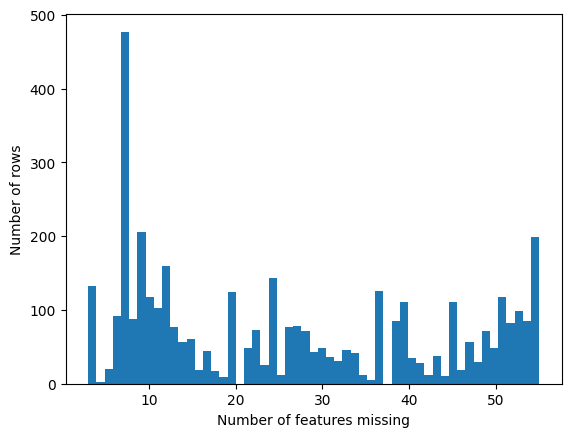

In [12]:
t2 = t1.isnull().sum(axis=1)
t2.head()
plt.hist(t2, bins=55)
plt.xlabel("Number of features missing")
plt.ylabel("Number of rows")
plt.show()

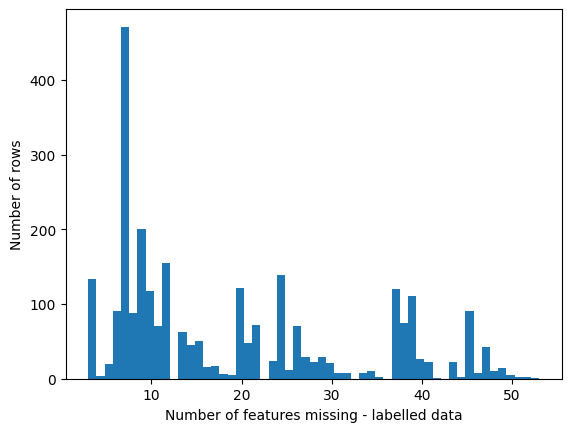

In [13]:
t3 = t1.loc[train_data['sii'].notna()].isnull().sum(axis=1)
#t3.head()
plt.hist(t3, bins=55)
plt.xlabel("Number of features missing - labelled data")
plt.ylabel("Number of rows")
plt.show()

In [14]:
t3.describe()

count    2736.000000
mean       18.896564
std        13.312716
min         3.000000
25%         7.000000
50%        13.000000
75%        27.000000
max        53.000000
dtype: float64

# 2. Make an initial list of potentially useful fields

In [ ]:
# I want to check how the children only and adolescent only fields are looking.
# If they are a similar scale, they may be able to be combined

train_data[['id','Basic_Demos-Age','PAQ_A-PAQ_A_Total','PAQ_C-PAQ_C_Total']].head(10)

In [ ]:
# It seems at first glance that they either have PAQ_A or PAQ_C (or neither)
# I want to make sure this is the case, then I want to see if its the same scale

train_data[['id','Basic_Demos-Age','PAQ_A-PAQ_A_Total','PAQ_C-PAQ_C_Total']].loc[train_data['PAQ_A-PAQ_A_Total'].notnull() & train_data['PAQ_C-PAQ_C_Total'].notnull()].head()

There is only one entry with both PAQ_A and PAQ_C. 
Values are pretty close, so it might be fine to combine this field, e.g., use A if present, else C

In [ ]:
train_data[['id','Basic_Demos-Age','PAQ_A-PAQ_A_Total','PAQ_C-PAQ_C_Total']].describe()

They have a similar scale but different mean. Might be worth normalising these fields before combining them (if we want to compare them to their peers). On the other hand, perhaps adolescents have a different predisposition to sii than children, so we would be losing info by normalising. But we also have the age field, so I think it is okay to normalise and combine

### Fields:
* Basic_Demos-Age (num)
* Basic_Demos-Sex (cat)
* CGAS-CGAS_Score (num)
* Physical-BMI (num) - may choose to drop height and weight as consequence - do we have bmi in all cases where we have height and weight?. Perhaps we can also combine this with BIA-BIA_BMI in case of missing values
* Physical-Waist_Circumference (num) - may require engineering based on age or height (+ sex?)
* Physical-Diastolic_BP (num)
* Physical-HeartRate (num)
* Physical-Systolic_BP (num)
* Fitness_Endurance-Max_Stage (num)
* Fitness_Endurance-Time_Mins (num)
* Fitness_Endurance-Time_Sec (num)
* FGC-FGC_CU_Zone (cat) - choosing the zone rather than number as it is more agnostic to age
* FGC-FGC_GSND_Zone (cat)
* FGC-FGC_GSD_Zone (cat)
* FGC-FGC_PU_Zone (cat)
* FGC-FGC_SRL_Zone (cat)
* FGC-FGC_SRR_Zone (cat)
* FGC-FGC_TL_Zone (cat)
* BIA-BIA_Activity_Level_num (num)
* BIA-BIA_DEE (num)
* BIA-BIA_Fat (num)
* PAQ_A-PAQ_A_Total / PAQ_C-PAQ_C_Total (num) - combine these scores
* SDS-SDS_Total_Raw / SDS-SDS_Total_T (num) - need to check these fields, what do they look like. Which one do we use?
* PreInt_EduHx-computerinternet_hoursday (num)

So far this doesn't include any seasons, nor many of the BIA metrics. It may also be useful to include some aggregate fields from the parquet data.

# 3. Explore the data using visualisation techniques

In [ ]:
# Basic_Demos-Age (num), Basic_Demos-Sex (cat), CGAS-CGAS_Score (num)
train_data[['id','Basic_Demos-Age','Basic_Demos-Sex','CGAS-CGAS_Score']].info()


In [ ]:
train_data[['id','Basic_Demos-Age','Basic_Demos-Sex','CGAS-CGAS_Score']].head(5)

* Age - 3960/3960 values, numerical - standardisation

* Sex - 3960/3960 values, categorical 0 or 1 - no transformation

* CGAS Score - 2421/3960 values, numerical - standardisation and imputation

In [ ]:
# Physical-BMI (num), BIA-BIA_BMI (num)
# Check whether they match each other + weight/(height^2)

train_data[['id','Physical-BMI','BIA-BIA_BMI','Physical-Height','Physical-Weight']].info()


In [ ]:
train_data[['id','Physical-BMI','BIA-BIA_BMI','Physical-Height','Physical-Weight']].head()


In [ ]:
# Calculate BMI from height and weight - then select rows where there is a big difference between three measures
# Remember to convert inches to metres (divide by 39.37) and pounds to kg (divide by 2.205)

train_data['Physical-BMI-Calc'] = train_data.apply(lambda row: (row['Physical-Weight']/2.205)/((row['Physical-Height']/39.37)*(row['Physical-Height']/39.37)), axis=1)
train_data[['id','Basic_Demos-Age','Physical-BMI','BIA-BIA_BMI','Physical-Height','Physical-Weight','Physical-BMI-Calc']].head()


In [ ]:
# At first glance all looks okay. Check for major discrepancies

train_data.loc[abs(train_data['Physical-BMI']-train_data['Physical-BMI-Calc'])>=0.5]


No instances of badly calculated BMI

In [ ]:
train_data[['id','Basic_Demos-Age','Physical-BMI','BIA-BIA_BMI','Physical-Height','Physical-Weight','Physical-BMI-Calc']].loc[abs(train_data['Physical-BMI']-train_data['BIA-BIA_BMI'])>=0.5]

There are 84 cases where the Physical-BMI is significantly different to the BIA-BIA_BMI

In [ ]:
train_data[['id','Physical-BMI','BIA-BIA_BMI']].describe()


It is hard to say which measure is more accurate in the case of discrepancy without deeper checks of specific instances to see whether the height and weight makes sense for the age of the child.abs

Since there is data for 3022 vs 1991 instances, and we have height and weight data to justify the Physical-BMI measure, we will use that as the default, i.e., create a combined field which is Physical-BMI if present, otherwise BIA-BIA_BMI - standardisation and imputation needed.

In [ ]:
# Physical-Waist_Circumference (num), Physical-Diastolic_BP (num), Physical-HeartRate (num), Physical-Systolic_BP (num)

train_data[['id','Physical-Waist_Circumference','Physical-Diastolic_BP','Physical-HeartRate', 'Physical-Systolic_BP']].info()

In [ ]:
train_data[['id','Physical-Waist_Circumference','Physical-Diastolic_BP','Physical-HeartRate', 'Physical-Systolic_BP']].head(10)

* Physical-Waist_Circumference - 898/3960 values, numerical - probably better as a ratio with height, but would require first imputation of height, and then there are still a lot of missing values. So may drop this field for now - on the other hand, it can be a useful indicator of physical fitness, so can be added in future

* Physical-Diastolic_BP - 2954/3960 values, numerical - standardisation and imputation

* Physical-HeartRate - 2967/3960 values, numerical - standardisation and imputation

* Physical-Systolic_BP - 2954/3960 values, numerical - standardisation and imputation

In [ ]:
# Fitness_Endurance-Max_Stage (num), Fitness_Endurance-Time_Mins (num), Fitness_Endurance-Time_Sec (num)

train_data[['id','Fitness_Endurance-Max_Stage','Fitness_Endurance-Time_Mins','Fitness_Endurance-Time_Sec']].info()

In [ ]:
train_data[['id','Fitness_Endurance-Max_Stage','Fitness_Endurance-Time_Mins','Fitness_Endurance-Time_Sec']].head(10)

In [ ]:
train_data[['id','Fitness_Endurance-Max_Stage','Fitness_Endurance-Time_Mins','Fitness_Endurance-Time_Sec']].describe()

It is clear from the data that the minutes and seconds fields are not the same time expressed in minutes and in seconds, but are to be taken together. So we need to create a new field for seconds as: minutes*60 + seconds.

Even though what constitutes a good score depends on the age of the child, there is no need to do any manipulation, like for waist size being done as a ratio with height in order to be a useful indicator.

This is because the better the score, the better in general, for a child of any age.

* Fitness_Endurance-Max_Stage - 743/3960 values, numerical - standardisation and imputation. May be tricky as there are so many values missing. Can use KNN.

* Fitness_Endurance-Time_Sec_Calc - 740/3960 values, numerical - create calculated field. Standardisation and imputation

In [ ]:
# FGC-FGC_CU_Zone (cat), FGC-FGC_GSND_Zone (cat), FGC-FGC_GSD_Zone (cat), FGC-FGC_PU_Zone (cat), FGC-FGC_SRL_Zone (cat), FGC-FGC_SRR_Zone (cat), FGC-FGC_TL_Zone (cat)

train_data[['id','FGC-FGC_CU_Zone','FGC-FGC_GSND_Zone','FGC-FGC_GSD_Zone','FGC-FGC_PU_Zone','FGC-FGC_SRL_Zone','FGC-FGC_SRR_Zone','FGC-FGC_TL_Zone']].info()

In [ ]:
train_data[['id','FGC-FGC_CU_Zone','FGC-FGC_GSND_Zone','FGC-FGC_GSD_Zone','FGC-FGC_PU_Zone','FGC-FGC_SRL_Zone','FGC-FGC_SRR_Zone','FGC-FGC_TL_Zone']].head(10)

In fact, these are not just categorical variables, they are ordinal. Therefore, no encoding or standardisation is required; they can be treated as numerical data. However, we should avoid using imputation methods like median or mean as this assumes some numerical properties of the data like linearity. We can use mode or KNN imputation, given that most of the values are missing.

* FGC-FGC_CU_Zone - 2282/3960 values, numerical 0 or 1 - imputation
* FGC-FGC_GSND_Zone - 1062/3960 values, numerical 1,2,3 - imputation
* FGC-FGC_GSD_Zone - 1063/3960 values, numerical 1,2,3 - imputation
* FGC-FGC_PU_Zone - 2271/3960 values, numerical 0 or 1 - imputation
* FGC-FGC_SRL_Zone - 2267/3960 values, numerical 0 or 1 - imputation
* FGC-FGC_SRR_Zone - 2269/3960 values, numerical 0 or 1 - imputation
* FGC-FGC_TL_Zone - 2285/3960 values, numerical 0 or 1 - imputation

In [22]:
# BIA-BIA_Activity_Level_num (num / cat int), BIA-BIA_DEE (num), BIA-BIA_Fat (num)

train_data[['id','BIA-BIA_Activity_Level_num','BIA-BIA_DEE','BIA-BIA_Fat']].describe()

,BIA-BIA_Activity_Level_num,BIA-BIA_DEE,BIA-BIA_Fat
count,1991.000000,1991.000000,1991.000000
mean,2.651431,2064.693747,16.855020
std,1.028267,2836.246272,199.372119
min,1.000000,1073.450000,-8745.080000
25%,2.000000,1605.785000,8.602395
50%,3.000000,1863.980000,16.174600
75%,3.000000,2218.145000,30.273100
max,5.000000,124728.000000,153.820000


In [27]:
train_data[['BIA-BIA_Fat','BIA-BIA_DEE','BIA-BIA_BMI','Physical-HeartRate','Physical-Systolic_BP','Physical-Diastolic_BP']].describe()

,BIA-BIA_Fat,BIA-BIA_DEE,BIA-BIA_BMI,Physical-HeartRate,Physical-Systolic_BP,Physical-Diastolic_BP
count,1991.000000,1991.000000,1991.000000,2967.000000,2954.000000,2954.000000
mean,16.855020,2064.693747,19.367048,81.597236,116.983074,69.648951
std,199.372119,2836.246272,5.047848,13.665196,17.061225,13.611226
min,-8745.080000,1073.450000,0.048267,27.000000,0.000000,0.000000
25%,8.602395,1605.785000,15.913600,72.000000,107.000000,61.000000
50%,16.174600,1863.980000,17.966500,81.000000,114.000000,68.000000
75%,30.273100,2218.145000,21.461100,90.500000,125.000000,76.000000
max,153.820000,124728.000000,53.924300,138.000000,203.000000,179.000000


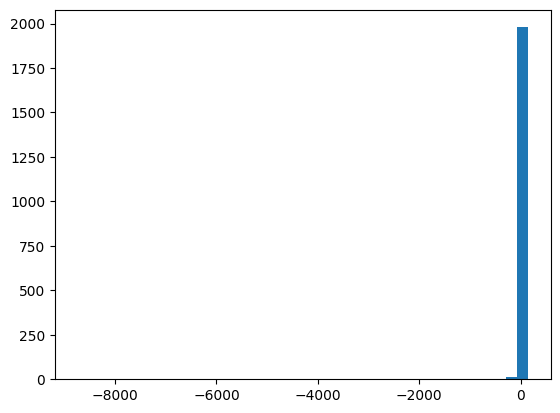

In [20]:
plt.hist(train_data['BIA-BIA_Fat'], bins=40) # So we can see the outliers are single values
plt.show()

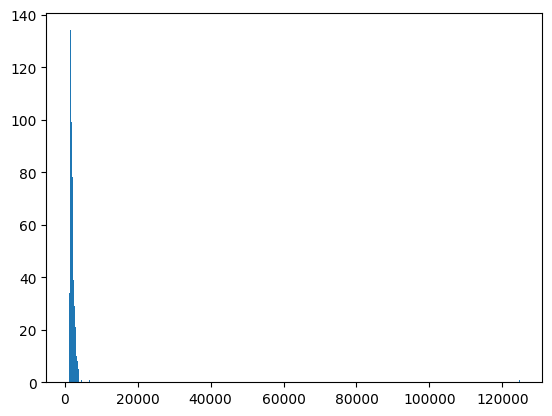

In [17]:
plt.hist(train_data['BIA-BIA_DEE'], bins=2000) # So we can see the outliers are single values
plt.show()

Looks like there are some values for DEE and Fat which are completely wrong. These outliers can be dropped and possibly imputed at a later stage.

In [ ]:
train_data[['id','BIA-BIA_Activity_Level_num','BIA-BIA_DEE','BIA-BIA_Fat']].head(10)

* BIA-BIA_Activity_Level_num - 1991/3960 values, numerical 1,2,3,4,5 - KNN imputation
* BIA-BIA_DEE - 1991/3960 values, numerical - standardisation, imputation, outlier removal
* BIA-BIA_Fat - 1991/3960 values, numerical - standardisation, imputation, outlier removal

In [ ]:
# SDS-SDS_Total_Raw, SDS-SDS_Total_T (num), PreInt_EduHx-computerinternet_hoursday (num)

train_data[['id','SDS-SDS_Total_Raw','SDS-SDS_Total_T','PreInt_EduHx-computerinternet_hoursday']].info()

In [ ]:
train_data[['id','SDS-SDS_Total_Raw','SDS-SDS_Total_T','PreInt_EduHx-computerinternet_hoursday']].head(10)

In [ ]:
train_data[['id','SDS-SDS_Total_Raw','SDS-SDS_Total_T','PreInt_EduHx-computerinternet_hoursday']].describe()

In [ ]:
# Graph SDS Raw vs SDS T

#train_data.plot(x='col_name_1', y='col_name_2')

plt.scatter(train_data['SDS-SDS_Total_Raw'], train_data['SDS-SDS_Total_T'])
plt.show()

In [ ]:
train_data.plot(x='SDS-SDS_Total_Raw', y='SDS-SDS_Total_T')

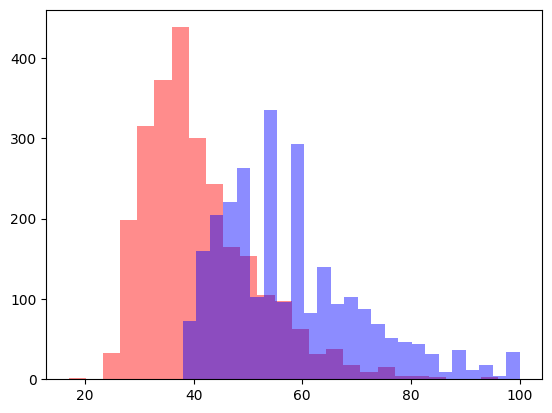

In [16]:
plt.hist(train_data['SDS-SDS_Total_Raw'], bins=25, alpha=0.45, color='red')
plt.hist(train_data['SDS-SDS_Total_T'], bins=25, alpha=0.45, color='blue')
  
plt.show()

In [ ]:
plt.hist(train_data['SDS-SDS_Total_Raw'])
plt.show()

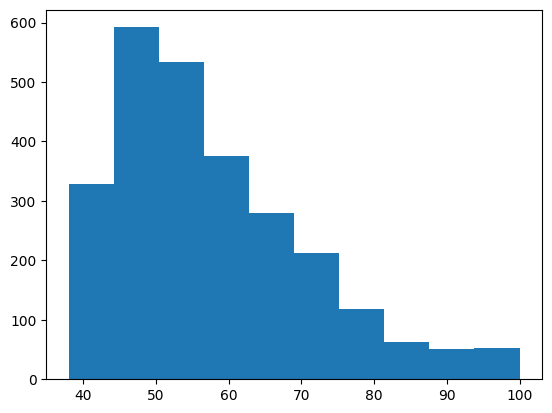

In [15]:
plt.hist(train_data['SDS-SDS_Total_T'])
plt.show()

Looking at the relationship between the fields, as well as researching: https://www.psychiatry.org/File%20Library/Psychiatrists/Practice/DSM/APA_DSM5_Level-2-Sleep-Disturbance-Adult.pdf

It seems that the t-score is a standardisation and rescaling of the raw score, which may be more useful. I also don't know if the raw score is including the recalculation if not all questions are answered, but the t-score would be the final score which is used to determine sleep disturbance.

We will choose to use the t-score metric over the raw score. We are missing 3 more values, which is not significant as we will have to impute >1300 values anyway.

* SDS-SDS_Total_T - 2606/3960 values, numerical - standardisation, imputation
* PreInt_EduHx-computerinternet_hoursday - 3301/3960 values, numerical - since they are all integers ranging from 0 to 3, it might be fine to treat these as we do ordinal categorical integers. We are also not missing as many values, so we can do a mode imputation instead of a KNN imputation if we want.

In [ ]:
import pandas as pd

# Load a Parquet file into a DataFrame
df_parquet = pd.read_parquet('/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=15dbc929/part-0.parquet')

# Display the first few rows of the Parquet data
print(df_parquet.head())

In [ ]:
df_parquet.info()

In [ ]:
df_parquet.describe()

# Final list of fields

* Basic_Demos-Age (num) - 3960/3960 values, numerical - standardisation
* Basic_Demos-Sex (cat) - 3960/3960 values, categorical 0 or 1 - no transformation
* CGAS-CGAS_Score (num) - 2421/3960 values, numerical - standardisation, imputation, outlier removal
* Physical-BMI_Calc (num) - >=3022/3960 values. Calculated - use BIA-BIA_BMI if available and Physical-BMI isn't - standardisation and imputation
* Physical-Diastolic_BP (num) - 2954/3960 values, numerical - standardisation, imputation, outlier removal
* Physical-HeartRate (num) - 2967/3960 values, numerical - standardisation, imputation, outlier removal
* Physical-Systolic_BP (num) - 2954/3960 values, numerical - standardisation and imputation
* Fitness_Endurance-Max_Stage (num) - 743/3960 values, numerical - standardisation and imputation
* Fitness_Endurance-Time_Sec_Calc (num) - 740/3960 values, numerical - create calculated field from Fitness_Endurance-Time_Mins and Fitness_Endurance-Time_Sec - Standardisation and imputation
* FGC-FGC_CU_Zone (cat) - 2282/3960 values, categorical 0 or 1 - imputation
* FGC-FGC_GSND_Zone (cat) - 1062/3960 values, categorical 1,2,3 - imputation
* FGC-FGC_GSD_Zone (cat) - 1063/3960 values, categorical 1,2,3 - imputation
* FGC-FGC_PU_Zone (cat) - 2271/3960 values, categorical 0 or 1 - imputation
* FGC-FGC_SRL_Zone (cat) - 2267/3960 values, categorical 0 or 1 - imputation
* FGC-FGC_SRR_Zone (cat) - 2269/3960 values, categorical 0 or 1 - imputation
* FGC-FGC_TL_Zone (cat) - 2285/3960 values, categorical 0 or 1 - imputation
* BIA-BIA_Activity_Level_num (cat) - 1991/3960 values, categorical 1,2,3,4,5 - imputation
* BIA-BIA_DEE (num) - 1991/3960 values, numerical - standardisation, imputation, outlier removal
* BIA-BIA_Fat (num) - 1991/3960 values, numerical - standardisation, imputation, outlier removal
* PAQ_Total (num) - ~2200/3960 values, numerical. Calculated - use PAQ_A-PAQ_A_Total if present, else PAQ_C-PAQ_C_Total - standardisation and imputation
* SDS-SDS_Total_T (num) - 2606/3960 values - standardisation and imputation
* PreInt_EduHx-computerinternet_hoursday - 3301/3960 values, numerical/categorical int - imputation

22 fields.

Future improvements - add waist size. Add parquet file aggregation.

# Create training data sets (process to be copied for test data)

In [ ]:
X_train = train_data[['Basic_Demos-Age',
                      'Basic_Demos-Sex',
                      'CGAS-CGAS_Score',
                      'Physical-BMI',
                      'BIA-BIA_BMI',
                      'Physical-Diastolic_BP',
                      'Physical-HeartRate',
                      'Physical-Systolic_BP',
                      'Fitness_Endurance-Max_Stage',
                      'Fitness_Endurance-Time_Mins',
                      'Fitness_Endurance-Time_Sec',
                      'FGC-FGC_CU_Zone',
                      'FGC-FGC_GSND_Zone',
                      'FGC-FGC_GSD_Zone',
                      'FGC-FGC_PU_Zone',
                      'FGC-FGC_SRL_Zone',
                      'FGC-FGC_SRR_Zone',
                      'FGC-FGC_TL_Zone',
                      'BIA-BIA_Activity_Level_num',
                      'BIA-BIA_DEE',
                      'BIA-BIA_Fat',
                      'PAQ_A-PAQ_A_Total',
                      'PAQ_C-PAQ_C_Total',
                      'SDS-SDS_Total_T',
                      'PreInt_EduHx-computerinternet_hoursday']]

X_train.describe()

In [ ]:
X_train['Physical-BMI_Calc'] = X_train.apply(lambda row: row['Physical-BMI'] if row['Physical-BMI']==row['Physical-BMI'] else row['BIA-BIA_BMI'],axis=1)
X_train[['Physical-BMI_Calc','BIA-BIA_BMI','Physical-BMI']].describe()

In [ ]:
X_train['Fitness_Endurance-Time_Sec_Calc'] = X_train.apply(lambda row: row['Fitness_Endurance-Time_Sec'] + (row['Fitness_Endurance-Time_Mins']*60), axis=1)
X_train[['Fitness_Endurance-Time_Sec_Calc','Fitness_Endurance-Time_Sec','Fitness_Endurance-Time_Mins']].head(10)

In [ ]:
X_train['PAQ_Total'] = X_train.apply(lambda row: row['PAQ_A-PAQ_A_Total'] if row['PAQ_A-PAQ_A_Total']==row['PAQ_A-PAQ_A_Total'] else row['PAQ_C-PAQ_C_Total'],axis=1)
X_train[['PAQ_A-PAQ_A_Total','PAQ_C-PAQ_C_Total','PAQ_Total']].describe()

# Note that we did not standardise each score before combining - possible improvement here.

In [ ]:
X_train.describe()

In [ ]:
# Drop columns which are no longer needed

X_train = X_train.drop(columns=['PAQ_A-PAQ_A_Total','PAQ_C-PAQ_C_Total',
                     'Physical-BMI','BIA-BIA_BMI',
                     'Fitness_Endurance-Time_Mins','Fitness_Endurance-Time_Sec'])

X_train.describe()

# Handle probable erroneous values

* CGAS-CGAS_Score (num)
* Physical-Diastolic_BP (num)
* Physical-HeartRate (num)
* Physical-Systolic_BP (num)
* BIA-BIA_DEE (num)
* BIA-BIA_Fat (num)

In [ ]:
X_train[['CGAS-CGAS_Score','Physical-Diastolic_BP','Physical-HeartRate','Physical-Systolic_BP','BIA-BIA_DEE','BIA-BIA_Fat']].describe()

In [ ]:
X_train.loc[X_train['CGAS-CGAS_Score']>=100.0]

In [ ]:
X_train.loc[2065]

In [ ]:
X_train.loc[X_train['CGAS-CGAS_Score']>=100.0,'CGAS-CGAS_Score'] = np.nan
#X_train[['CGAS-CGAS_Score','Physical-Diastolic_BP','Physical-HeartRate','Physical-Systolic_BP','BIA-BIA_DEE','BIA-BIA_Fat']].describe()
X_train.loc[2065]

In [ ]:
X_train.loc[X_train['Physical-Systolic_BP']>=180.0,'Physical-Systolic_BP'] = np.nan
X_train[['CGAS-CGAS_Score','Physical-Diastolic_BP','Physical-HeartRate','Physical-Systolic_BP','BIA-BIA_DEE','BIA-BIA_Fat']].describe()

In [ ]:
X_train.loc[X_train['Physical-Diastolic_BP']>=120.0,'Physical-Diastolic_BP'] = np.nan
X_train[['CGAS-CGAS_Score','Physical-Diastolic_BP','Physical-HeartRate','Physical-Systolic_BP','BIA-BIA_DEE','BIA-BIA_Fat']].describe()

In [ ]:
X_train.loc[X_train['BIA-BIA_DEE']>=6000.0].describe()

In [ ]:
X_train.loc[X_train['BIA-BIA_DEE']>=6000.0,'BIA-BIA_DEE'] = np.nan
X_train[['CGAS-CGAS_Score','Physical-Diastolic_BP','Physical-HeartRate','Physical-Systolic_BP','BIA-BIA_DEE','BIA-BIA_Fat']].describe()

In [ ]:
plt.hist(X_train.loc[X_train['BIA-BIA_Fat']>0.0]['BIA-BIA_Fat'], bins=2000)
plt.show()

In [ ]:
X_train.loc[X_train['BIA-BIA_Fat']>60.0]['BIA-BIA_Fat'].describe()

In [ ]:
X_train.loc[X_train['BIA-BIA_Fat']<=8.0]['BIA-BIA_Fat'].describe()

Surprisingly, we have 439 instances with body fat % under 8%, and 118 over 60%. This indicates that this reading may not be too reliable. It should be okay to drop all these values even thoough there are so many, because they should not be correct. We may also consider dropping the field entirely since it seems so inaccurate.

In [ ]:
X_train.loc[(X_train['BIA-BIA_Fat']<=8.0) | (X_train['BIA-BIA_Fat']>=60.0),'BIA-BIA_Fat'] = np.nan
X_train[['CGAS-CGAS_Score','Physical-Diastolic_BP','Physical-HeartRate','Physical-Systolic_BP','BIA-BIA_DEE','BIA-BIA_Fat']].describe()

# Impute missing values

In [ ]:
from sklearn.impute import KNNImputer

X_train.describe()

In [ ]:
knn_imputer = KNNImputer(n_neighbors=15) 
# Potential improvement - try different n_neighbours

In [ ]:
X_train_imputed = pd.DataFrame(knn_imputer.fit_transform(X_train), columns = X_train.columns)
X_train_imputed.describe()

In [ ]:
# Check how the imputation affected frequency histograms

plt.hist(X_train['Fitness_Endurance-Max_Stage'], bins=25, alpha=0.45, color='red')
plt.hist(X_train_imputed['Fitness_Endurance-Max_Stage'], bins=25, alpha=0.45, color='blue')
  
plt.show()

In [ ]:
plt.hist(X_train['BIA-BIA_Fat'], bins=25, alpha=0.45, color='red')
plt.hist(X_train_imputed['BIA-BIA_Fat'], bins=25, alpha=0.45, color='blue')
  
plt.show()

It appears that the imputation is working correctly

# Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
numerical_columns = ['Basic_Demos-Age',
                     'CGAS-CGAS_Score',
                     'Physical-BMI_Calc',
                     'Physical-Diastolic_BP',
                     'Physical-HeartRate',
                     'Physical-Systolic_BP',
                     'Fitness_Endurance-Max_Stage',
                     'Fitness_Endurance-Time_Sec_Calc',
                     'BIA-BIA_DEE',
                     'BIA-BIA_Fat',
                     'PAQ_Total',
                     'SDS-SDS_Total_T'
                    ]
X_train_imputed[numerical_columns] = scaler.fit_transform(X_train_imputed[numerical_columns])

X_train_imputed.describe()

# Target data

In [ ]:
# We will predict PCIAT_Total, and use that to calculate sii
#y_train = train_data[['PCIAT-PCIAT_Total','sii']]
y_train = train_data[['PCIAT-PCIAT_Total']]
y_train.describe()

In [ ]:
y_train.info()

In [ ]:
# Use a model to impute target values

print("X_train shape: ", X_train_imputed.shape)
print("y_train shape: ", y_train.shape)

In [ ]:
train_data_merged = pd.concat([X_train_imputed, y_train],axis=1)
train_data_merged.head()

In [ ]:
train_data_merged.info()

In [ ]:
known_data = train_data_merged[train_data_merged['PCIAT-PCIAT_Total'].notna()]
X_train_intermediate = known_data.drop(columns=['PCIAT-PCIAT_Total'])
y_train_intermediate = known_data['PCIAT-PCIAT_Total']

print("known_data shape: ", known_data.shape)
print("X_train_intermediate shape: ", X_train_intermediate.shape)
print("y_train_intermediate shape: ", y_train_intermediate.shape)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

imputation_model = RandomForestRegressor()
imputation_model.fit(X_train_intermediate, y_train_intermediate)

In [ ]:
# Predict missing targets
missing_data = train_data_merged[train_data_merged['PCIAT-PCIAT_Total'].isna()]
X_missing = missing_data.drop(columns=['PCIAT-PCIAT_Total'])
y_missing = imputation_model.predict(X_missing)

print("missing_data shape: ", missing_data.shape)
print("X_missing shape: ", X_missing.shape)
print("y_missing: ", y_missing.shape)

In [ ]:
y_missing[:5]

In [ ]:
train_data_merged.loc[train_data_merged['PCIAT-PCIAT_Total'].isna(), 'PCIAT-PCIAT_Total'] = y_missing
train_data_merged.info()

In [ ]:
train_data_merged.head()

In [ ]:
X_train_final = train_data_merged.drop(columns=['PCIAT-PCIAT_Total'])
y_train_final = train_data_merged['PCIAT-PCIAT_Total']

print("X_train_final shape: ", X_train_final.shape)
print("y_train_final shape: ", y_train_final.shape)

# Prediction model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(32, input_shape=(X_train_final.shape[1],), activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(16, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(8, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(1, activation="linear")
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss="mean_squared_error", 
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_final, y_train_final, batch_size=50, epochs=100)

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Repeat data manipulation on test data

In [ ]:
test_data=pd.read_csv('/kaggle/input/child-mind-institute-problematic-internet-use/test.csv')
test_data.head()

In [ ]:
X_test = test_data[['Basic_Demos-Age',
                      'Basic_Demos-Sex',
                      'CGAS-CGAS_Score',
                      'Physical-BMI',
                      'BIA-BIA_BMI',
                      'Physical-Diastolic_BP',
                      'Physical-HeartRate',
                      'Physical-Systolic_BP',
                      'Fitness_Endurance-Max_Stage',
                      'Fitness_Endurance-Time_Mins',
                      'Fitness_Endurance-Time_Sec',
                      'FGC-FGC_CU_Zone',
                      'FGC-FGC_GSND_Zone',
                      'FGC-FGC_GSD_Zone',
                      'FGC-FGC_PU_Zone',
                      'FGC-FGC_SRL_Zone',
                      'FGC-FGC_SRR_Zone',
                      'FGC-FGC_TL_Zone',
                      'BIA-BIA_Activity_Level_num',
                      'BIA-BIA_DEE',
                      'BIA-BIA_Fat',
                      'PAQ_A-PAQ_A_Total',
                      'PAQ_C-PAQ_C_Total',
                      'SDS-SDS_Total_T',
                      'PreInt_EduHx-computerinternet_hoursday']]

X_test.describe()

In [ ]:
X_test.info()

In [ ]:
X_test['Physical-BMI_Calc'] = X_test.apply(lambda row: row['Physical-BMI'] if row['Physical-BMI']==row['Physical-BMI'] else row['BIA-BIA_BMI'],axis=1)

X_test['Fitness_Endurance-Time_Sec_Calc'] = X_test.apply(lambda row: row['Fitness_Endurance-Time_Sec'] + (row['Fitness_Endurance-Time_Mins']*60), axis=1)

X_test['PAQ_Total'] = X_test.apply(lambda row: row['PAQ_A-PAQ_A_Total'] if row['PAQ_A-PAQ_A_Total']==row['PAQ_A-PAQ_A_Total'] else row['PAQ_C-PAQ_C_Total'],axis=1)

In [ ]:
# Drop columns which are no longer needed

X_test = X_test.drop(columns=['PAQ_A-PAQ_A_Total','PAQ_C-PAQ_C_Total',
                     'Physical-BMI','BIA-BIA_BMI',
                     'Fitness_Endurance-Time_Mins','Fitness_Endurance-Time_Sec'])

X_test.describe()

In [ ]:
X_test.info()

In [ ]:
# Imputation, using the same imputer as for train data
X_test_imputed = pd.DataFrame(knn_imputer.transform(X_test), columns = X_test.columns)
X_test_imputed.describe()

In [ ]:
X_test_imputed.info()

In [ ]:
X_test_imputed.head()

In [ ]:
#Standardisation, using same scaler as train data
X_test_imputed[numerical_columns] = scaler.transform(X_test_imputed[numerical_columns])

X_test_imputed.describe()

In [ ]:
X_test_imputed.head()

In [ ]:
y_test = test_data[['id']]
y_test.info()

In [ ]:
y_test['PCIAT-PCIAT_Total'] = model.predict(X_test_imputed)
y_test.head()

In [ ]:
#y_test['sii'] = y_test.apply(lambda row: 0 if row['PCIAT-PCIAT_Total']<=30 else 1)

In [ ]:
y_test['sii'] = y_test.apply(lambda row: 0 if row['PCIAT-PCIAT_Total']<=30 else 
                             (1 if row['PCIAT-PCIAT_Total']<50 else (
                                2 if row['PCIAT-PCIAT_Total']<80 else (3)
                            )), axis=1)

In [ ]:
y_test.head(20)

In [ ]:
#y_test = y_test.drop(columns=['PCIAT-PCIAT_Total'])
#y_test.head()

In [ ]:
solution = y_test[['id','sii']]
solution.head()

In [ ]:
solution.to_csv("submission.csv", index=False)
print("Your submission was successfully saved!")